In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv


In [2]:
data = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')

In [3]:
plt.style.use('fivethirtyeight')

**Data exploration**

In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
data["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Text(0.5, 1.0, 'Class count')

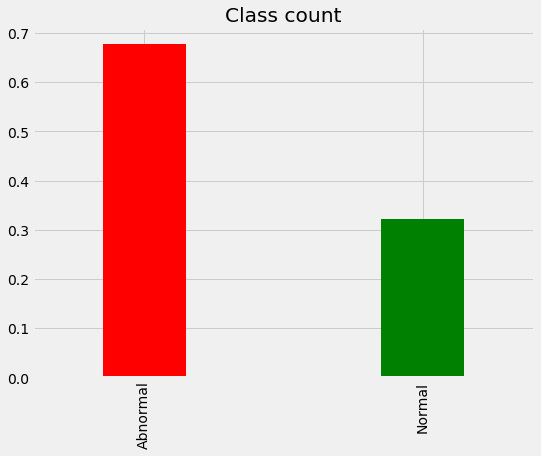

In [8]:
plt.figure(figsize=(8,6))
fig_class =  data['class'].value_counts(normalize=True).plot(kind="bar",color=['red','green'],width=0.3)
fig_class.set_title("Class count")

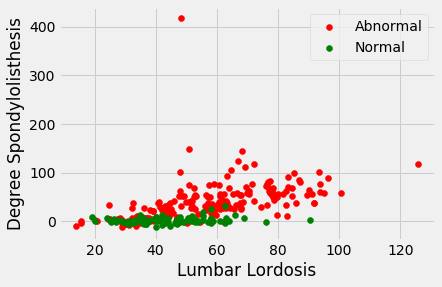

In [9]:
abnormal = data[data['class'] == "Abnormal"]
normal = data[data['class'] == "Normal"]
plt.scatter(abnormal['lumbar_lordosis_angle'], abnormal['degree_spondylolisthesis'], color = "red",label = "Abnormal")
plt.scatter(normal['lumbar_lordosis_angle'], normal['degree_spondylolisthesis'], color = "green",label = "Normal")
plt.legend()
plt.xlabel("Lumbar Lordosis")
plt.ylabel("Degree Spondylolisthesis")
plt.show()

**Pre-processing data
**

In [10]:
data['class'] = [1 if each == "Abnormal" else 0 for each in data['class']]

In [11]:
Y = data["class"]
X = data.drop(["class"],axis=1)

**KNeighborsClassifier**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=3)
knn_cv.fit(X,Y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7548387096774194


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
prediciton = knn.predict(x_test)
print("With KNN(3) accuracy is: ",knn.score(x_test,y_test))

With KNN(3) accuracy is:  0.8461538461538461


**RandomForestClassifier**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [200,300,400,500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rdf = RandomForestClassifier(random_state=42)
rdf_cv=GridSearchCV(rdf,param_grid,cv=3)
rdf_cv.fit(X,Y)
print("Tuned hyperparameter k: {}".format(rdf_cv.best_params_)) 
print("Best score: {}".format(rdf_cv.best_score_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned hyperparameter k: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 500}
Best score: 0.7322580645161291


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.25)
rf=RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto', n_estimators=500,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("With RandomForestClassifier accuracy is: ",rf.score(x_test,y_test))

With RandomForestClassifier accuracy is:  0.8076923076923077


**Confusion matrix**

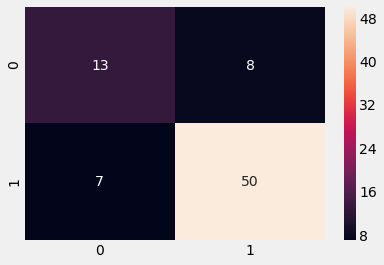

In [16]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

**LogisticRegression**

In [17]:
from sklearn.linear_model import LogisticRegression
param_grid={'C':np.logspace(-3,3,7),'penalty':['l1','l2']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(X,Y)
print("Tuned hyperparameter k: {}".format(logreg_cv.best_params_)) 
print("Best score: {}".format(logreg_cv.best_score_))

Tuned hyperparameter k: {'C': 100.0, 'penalty': 'l2'}
Best score: 0.7387096774193549


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.25)
logreg=LogisticRegression(C=100,penalty='l2',random_state=42)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("With LogisticRegression accuracy is: ",logreg.score(x_test,y_test))

With LogisticRegression accuracy is:  0.8717948717948718


**C-Support Vector Classification.**

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps=[('scalar',StandardScaler()),('SVM',SVC())]
pipeline=Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(X,Y)

y_pred = cv.predict(X)
print("Tuned Model Parameters: {}".format(cv.best_params_)) 
print("Accuracy: {}".format(cv.best_score_))

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
Accuracy: 0.7322580645161291


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.25)
steps=[('scalar',StandardScaler()),('SVM',SVC(C=100,gamma=0.01))]
pipeline = Pipeline(steps)
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print("With SVC accuracy is: ",pipeline.score(x_test,y_test))

With SVC accuracy is:  0.8461538461538461
